## TD 3
### Corally Ngov (2392143) et Lina Sadat (2378349)
---


### 1) i)

#### Variables d'etats: CA, CB, CC, T
#### Variables d'entrees: Fin, Tin, CAin

### ii)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

Valeurs en regime permanent :
CA = 1.51 mol/L
CB = 5.80 mol/L
CC = 0.19 mol/L
T = 339.88 K


<Figure size 2160x720 with 0 Axes>

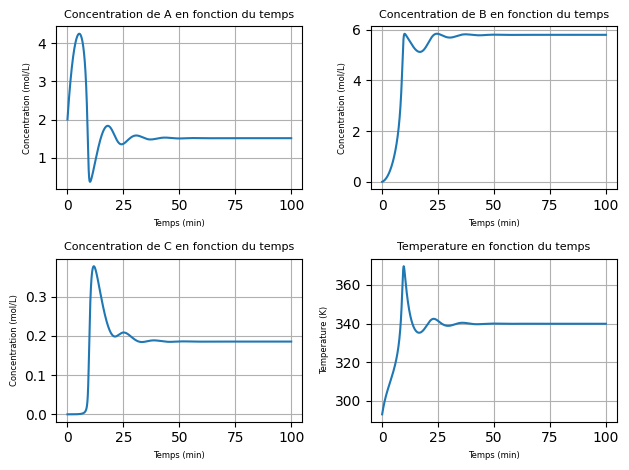

In [38]:

def bilans(t, x, p, u):
    [CA, CB, CC, T] = x #Variables d'etat
    [F, CAin, Tin, V, Hr1, Hr2, Cp, UA, Tc, rho] = p #parametres
    #Eq. diff
    k1 = 2.53 * 10**9 *np.exp (-7500 / T)
    k2 = 7.34 * 10**9 * np.exp(-9500 / T)
    dCA = (F / V) * (CAin - CA) - k1 * CA
    dCB = -(F / V) * CB + k1 * CA - k2 * CB
    dCC = -(F / V) * CC + k2 * CB
    dT = (F / V) * (Tin - T) + (1 / (rho * Cp)) * (- k1 * CA * Hr1 - k2 * CB * Hr2) - (UA * (T - Tc)) / (rho * V * Cp)
    return(dCA, dCB, dCC, dT)
    
#Conditions initiales
x0 = [2, 0, 0, 293]
p = [10.0, 7.5, 293, 60, -71.9, 33.1, 4.18, 85, 313, 1.0]
t_sim = [0, 100] #en min
u0 = []

sim = solve_ivp(bilans, t_sim, x0, method = 'RK45', args = (p, u0), max_step = 0.01)

CA_ii, CB_ii, CC_ii, T_ii = sim.y

#Valeurs en regime permanent
print('Valeurs en regime permanent :')
print(f'CA = {CA_ii[-1]:.2f} mol/L')
print(f'CB = {CB_ii[-1]:.2f} mol/L')
print(f'CC = {CC_ii[-1]:.2f} mol/L')
print(f'T = {T_ii[-1]:.2f} K')

#Graphiques
plt.figure(figsize=(18, 6), dpi=120)
fig, axs = plt.subplots(nrows = 2, ncols =2)


#Graph1
axs[0,0].plot(sim.t, CA_ii)
axs[0,0].set_title('Concentration de A en fonction du temps', fontsize = 8)
axs[0,0].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[0,0].set_xlabel('Temps (min)', fontsize = 6)
axs[0,0].grid()

#Graph2
axs[0,1].plot(sim.t, CB_ii)
axs[0,1].set_title('Concentration de B en fonction du temps', fontsize = 8)
axs[0,1].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[0,1].set_xlabel('Temps (min)', fontsize = 6)    
axs[0,1].grid()

#Graph3
axs[1,0].plot(sim.t, CC_ii)
axs[1,0].set_title('Concentration de C en fonction du temps', fontsize = 8)
axs[1,0].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[1,0].set_xlabel('Temps (min)', fontsize = 6)
axs[1,0].grid()

#Graph4
axs[1,1].plot(sim.t, T_ii)
axs[1,1].set_title('Temperature en fonction du temps', fontsize = 8)
axs[1,1].set_ylabel('Temperature (K)', fontsize = 6)
axs[1,1].set_xlabel('Temps (min)', fontsize = 6)
axs[1,1].grid()

plt.tight_layout()
plt.show()



### iii)

<Figure size 2160x720 with 0 Axes>

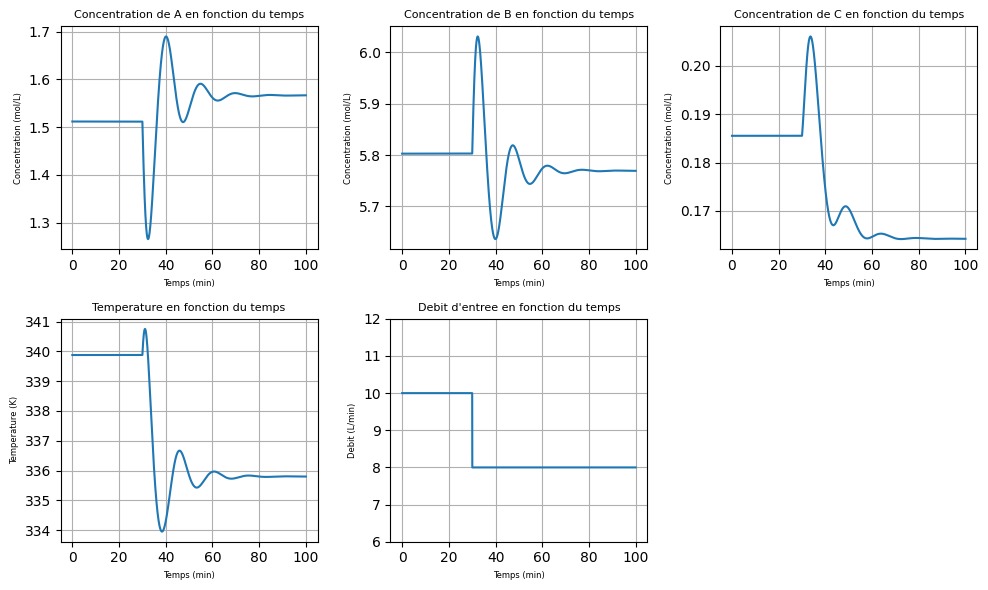

In [39]:
def bilans_changement_Fin(x, p, u):
    [CA, CB, CC, T] = x #Variables d'etat
    [CAin, Tin, V, Hr1, Hr2, Cp, UA, Tc, rho] = p #parametres
    [F] = u #Variable manipulee
    #Eq. diff
    k1 = 2.53 * 10**9 *np.exp (-7500 / T)
    k2 = 7.34 * 10**9 * np.exp(-9500 / T)
    dCA = (F / V) * (CAin - CA) - k1 * CA
    dCB = -(F / V) * CB + k1 * CA - k2 * CB
    dCC = -(F / V) * CC + k2 * CB
    dT = (F / V) * (Tin - T) + (1 / (rho * Cp)) * (- k1 * CA * Hr1 - k2 * CB * Hr2) - (UA * (T - Tc)) / (rho * V * Cp)
    return(dCA, dCB, dCC, dT)

def manip_Fin(t, x, p, t_changement):
    if t < t_changement:
        u = [10.0]
    else:
        u = [8.0]
    return bilans_changement_Fin(x, p, u)

#Conditions initiales  
x0 = [CA_ii[-1], CB_ii[-1], CC_ii[-1], T_ii[-1]]
p = [7.5, 293, 60, -71.9, 33.1, 4.18, 85, 313, 1.0]
t_sim = [0, 100] #en min
t_changement = 30 #en min

sim = solve_ivp(manip_Fin, t_sim, x0, method = 'RK45', args = (p, t_changement), max_step = 0.01)

#Graphiques
plt.figure(figsize=(18, 6), dpi=120)
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
CA, CB, CC, T = sim.y

#Graph1
axs[0,0].plot(sim.t, CA)
axs[0,0].set_title('Concentration de A en fonction du temps', fontsize = 8)
axs[0,0].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[0,0].set_xlabel('Temps (min)', fontsize = 6)
axs[0,0].grid()

#Graph2
axs[0,1].plot(sim.t, CB)
axs[0,1].set_title('Concentration de B en fonction du temps', fontsize = 8)
axs[0,1].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[0,1].set_xlabel('Temps (min)', fontsize = 6)
axs[0,1].grid()

#Graph3
axs[0,2].plot(sim.t, CC)
axs[0,2].set_title('Concentration de C en fonction du temps', fontsize = 8)  
axs[0,2].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[0,2].set_xlabel('Temps (min)', fontsize = 6)   
axs[0,2].grid()

#Graph4
axs[1,0].plot(sim.t, T)
axs[1,0].set_title('Temperature en fonction du temps', fontsize = 8) 
axs[1,0].set_ylabel('Temperature (K)', fontsize = 6)
axs[1,0].set_xlabel('Temps (min)', fontsize = 6)  
axs[1,0].grid()

#Graph5
axs[1,1].plot(sim.t, np.where(sim.t < t_changement, 10.0, 8.0))
axs[1,1].set_title("Debit d'entree en fonction du temps", fontsize = 8)
axs[1,1].set_ylim(6, 12)
axs[1,1].set_ylabel('Debit (L/min)', fontsize = 6)
axs[1,1].set_xlabel('Temps (min)', fontsize = 6)
axs[1,1].grid()

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()



### iv)

In [40]:

#Valeurs en regime permanent
print('Valeurs en regime permanent :')
print(f'CA = {CA[-1]:.2f} mol/L')
print(f'CB = {CB[-1]:.2f} mol/L')
print(f'CC = {CC[-1]:.2f} mol/L')
print(f'T = {T[-1]:.2f} K')

#Temps regime permanent
for i in range(len(sim.t)-1, 0, -1):
    if abs(CA[i] - CA[-1]) > 0.01 or abs(CB[i] - CB[-1]) > 0.01 or abs(CC[i] - CC[-1]) > 0.01 or abs(T[i] - T[-1]) > 0.01:
        temps_regime_permanent = sim.t[i+1]
        break


print(f'Temps pour atteindre le regime permanent : {temps_regime_permanent:.2f} min')    

Valeurs en regime permanent :
CA = 1.57 mol/L
CB = 5.77 mol/L
CC = 0.16 mol/L
T = 335.80 K
Temps pour atteindre le regime permanent : 84.42 min


### v)

<Figure size 2160x720 with 0 Axes>

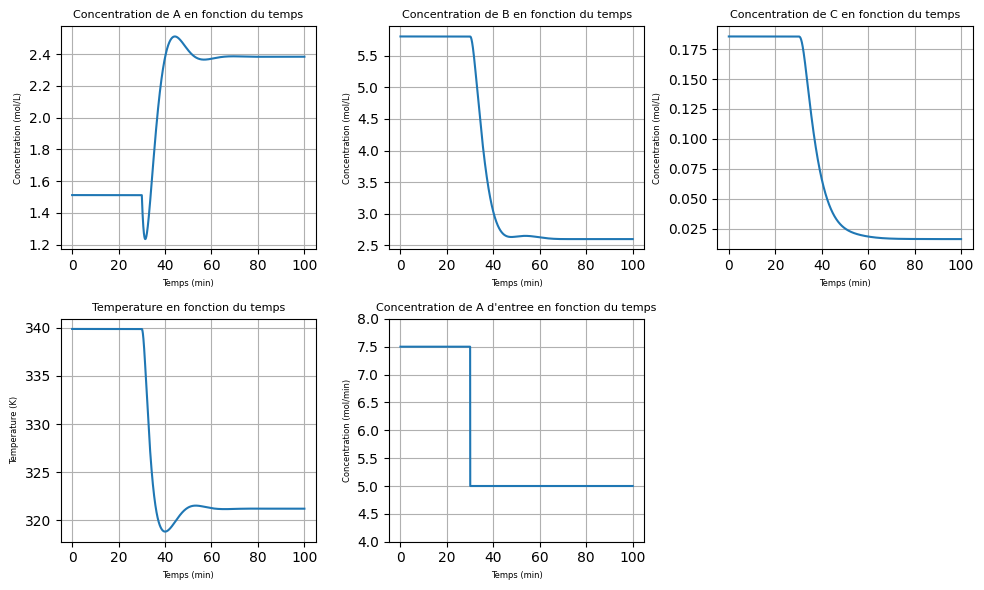

In [41]:
def bilans_changement_CAin(x, p, u):
    [CA, CB, CC, T] = x #Variables d'etat
    [F, Tin, V, Hr1, Hr2, Cp, UA, Tc, rho] = p #parametres
    [CAin] = u #Variable manipulee
    #Eq. diff
    k1 = 2.53 * 10**9 *np.exp (-7500 / T)
    k2 = 7.34 * 10**9 * np.exp(-9500 / T)
    dCA = (F / V) * (CAin - CA) - k1 * CA
    dCB = -(F / V) * CB + k1 * CA - k2 * CB
    dCC = -(F / V) * CC + k2 * CB
    dT = (F / V) * (Tin - T) + (1 / (rho * Cp)) * (- k1 * CA * Hr1 - k2 * CB * Hr2) - (UA * (T - Tc)) / (rho * V * Cp)
    return(dCA, dCB, dCC, dT)

def manip_CAin(t, x, p, t_changement):
    if t < t_changement:
        u = [7.5]
    else:
        u = [5.0]
    return bilans_changement_CAin(x, p, u)

#Conditions initiales  
x0 = [CA_ii[-1], CB_ii[-1], CC_ii[-1], T_ii[-1]]
p = [10, 293, 60, -71.9, 33.1, 4.18, 85, 313, 1.0]
t_sim = [0, 100] #en min
t_changement = 30 #en min

sim = solve_ivp(manip_CAin, t_sim, x0, method = 'RK45', args = (p, t_changement), max_step = 0.01)

#Graphiques
plt.figure(figsize=(18, 6), dpi=120)
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
CA, CB, CC, T = sim.y

#Graph1
axs[0,0].plot(sim.t, CA)
axs[0,0].set_title('Concentration de A en fonction du temps', fontsize = 8)
axs[0,0].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[0,0].set_xlabel('Temps (min)', fontsize = 6)
axs[0,0].grid()

#Graph2
axs[0,1].plot(sim.t, CB)
axs[0,1].set_title('Concentration de B en fonction du temps', fontsize = 8)
axs[0,1].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[0,1].set_xlabel('Temps (min)', fontsize = 6)
axs[0,1].grid()

#Graph3
axs[0,2].plot(sim.t, CC)
axs[0,2].set_title('Concentration de C en fonction du temps', fontsize = 8)  
axs[0,2].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[0,2].set_xlabel('Temps (min)', fontsize = 6)   
axs[0,2].grid()

#Graph4
axs[1,0].plot(sim.t, T)
axs[1,0].set_title('Temperature en fonction du temps', fontsize = 8) 
axs[1,0].set_ylabel('Temperature (K)', fontsize = 6)
axs[1,0].set_xlabel('Temps (min)', fontsize = 6)  
axs[1,0].grid()

#Graph5
axs[1,1].plot(sim.t, np.where(sim.t < t_changement, 7.5, 5.0))
axs[1,1].set_title("Concentration de A d'entree en fonction du temps", fontsize = 8)
axs[1,1].set_ylim(4, 8)
axs[1,1].set_ylabel('Concentration (mol/min)', fontsize = 6)
axs[1,1].set_xlabel('Temps (min)', fontsize = 6)
axs[1,1].grid()

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### vi)

In [42]:
#Valeurs en regime permanent
print('Valeurs en regime permanent :')
print(f'CA = {CA[-1]:.2f} mol/L')
print(f'CB = {CB[-1]:.2f} mol/L')
print(f'CC = {CC[-1]:.2f} mol/L')
print(f'T = {T[-1]:.2f} K')

#Temps regime permanent
for i in range(len(sim.t)-1, 0, -1):
    if abs(CA[i] - CA[-1]) > 0.01 or abs(CB[i] - CB[-1]) > 0.01 or abs(CC[i] - CC[-1]) > 0.01 or abs(T[i] - T[-1]) > 0.01:
        temps_regime_permanent = sim.t[i+1]
        break


print(f'Temps pour atteindre le regime permanent : {temps_regime_permanent:.2f} min')   

Valeurs en regime permanent :
CA = 2.38 mol/L
CB = 2.60 mol/L
CC = 0.02 mol/L
T = 321.20 K
Temps pour atteindre le regime permanent : 72.13 min


### vii)

<Figure size 2160x720 with 0 Axes>

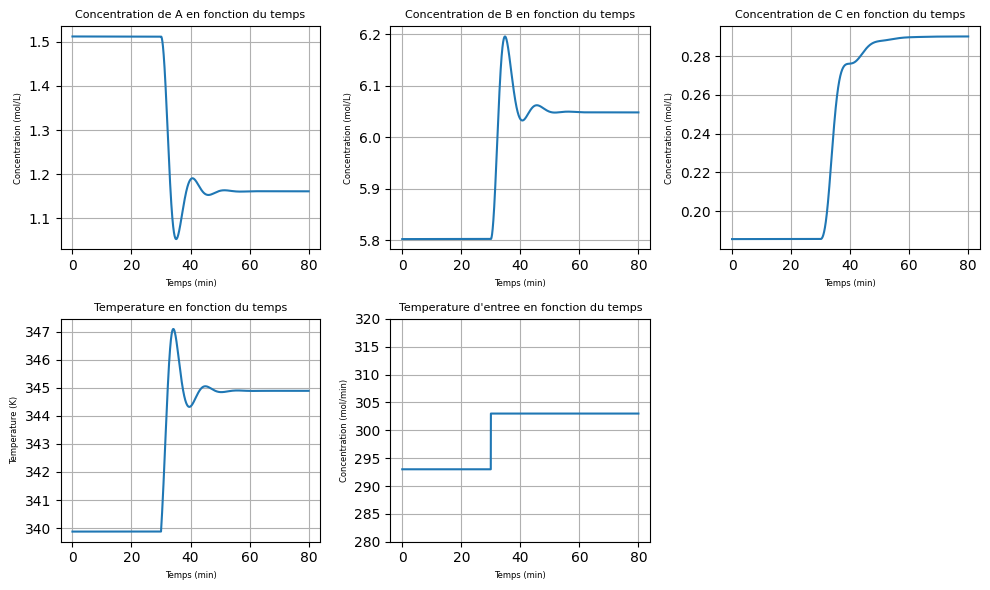

In [45]:
def bilans_changement_Tin(x, p, u):
    [CA, CB, CC, T] = x #Variables d'etat
    [F, CAin, V, Hr1, Hr2, Cp, UA, Tc, rho] = p #parametres
    [Tin] = u #Variable manipulee
    #Eq. diff
    k1 = 2.53 * 10**9 *np.exp (-7500 / T)
    k2 = 7.34 * 10**9 * np.exp(-9500 / T)
    dCA = (F / V) * (CAin - CA) - k1 * CA
    dCB = -(F / V) * CB + k1 * CA - k2 * CB
    dCC = -(F / V) * CC + k2 * CB
    dT = (F / V) * (Tin - T) + (1 / (rho * Cp)) * (- k1 * CA * Hr1 - k2 * CB * Hr2) - (UA * (T - Tc)) / (rho * V * Cp)
    return(dCA, dCB, dCC, dT)

def manip_Tin(t, x, p, t_changement):
    if t < t_changement:
        u = [293]
    else:
        u = [303]
    return bilans_changement_Tin(x, p, u)

#Conditions initiales  
x0 = [CA_ii[-1], CB_ii[-1], CC_ii[-1], T_ii[-1]]
p = [10, 7.5, 60, -71.9, 33.1, 4.18, 85, 313, 1.0]
t_sim = [0, 80] #en min
t_changement = 30 #en min

sim = solve_ivp(manip_Tin, t_sim, x0, method = 'RK45', args = (p, t_changement), max_step = 0.01)

#Graphiques
plt.figure(figsize=(18, 6), dpi=120)
fig, axs = plt.subplots(2, 3, figsize=(10, 6))
CA, CB, CC, T = sim.y

#Graph1
axs[0,0].plot(sim.t, CA)
axs[0,0].set_title('Concentration de A en fonction du temps', fontsize = 8)
axs[0,0].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[0,0].set_xlabel('Temps (min)', fontsize = 6)
axs[0,0].grid()

#Graph2
axs[0,1].plot(sim.t, CB)
axs[0,1].set_title('Concentration de B en fonction du temps', fontsize = 8)
axs[0,1].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[0,1].set_xlabel('Temps (min)', fontsize = 6)
axs[0,1].grid()

#Graph3
axs[0,2].plot(sim.t, CC)
axs[0,2].set_title('Concentration de C en fonction du temps', fontsize = 8)  
axs[0,2].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[0,2].set_xlabel('Temps (min)', fontsize = 6)   
axs[0,2].grid()

#Graph4
axs[1,0].plot(sim.t, T)
axs[1,0].set_title('Temperature en fonction du temps', fontsize = 8) 
axs[1,0].set_ylabel('Temperature (K)', fontsize = 6)
axs[1,0].set_xlabel('Temps (min)', fontsize = 6)  
axs[1,0].grid()

#Graph5
axs[1,1].plot(sim.t, np.where(sim.t < t_changement, 293, 303))
axs[1,1].set_title("Temperature d'entree en fonction du temps", fontsize = 8)
axs[1,1].set_ylim(280, 320)
axs[1,1].set_ylabel('Concentration (mol/min)', fontsize = 6)
axs[1,1].set_xlabel('Temps (min)', fontsize = 6)
axs[1,1].grid()

axs[1, 2].axis('off')

plt.tight_layout()
plt.show()

### viii)

In [46]:
#Valeurs en regime permanent
print('Valeurs en regime permanent :')
print(f'CA = {CA[-1]:.2f} mol/L')
print(f'CB = {CB[-1]:.2f} mol/L')
print(f'CC = {CC[-1]:.2f} mol/L')
print(f'T = {T[-1]:.2f} K')

#Temps regime permanent
for i in range(len(sim.t)-1, 0, -1):
    if abs(CA[i] - CA[-1]) > 0.01 or abs(CB[i] - CB[-1]) > 0.01 or abs(CC[i] - CC[-1]) > 0.01 or abs(T[i] - T[-1]) > 0.01:
        temps_regime_permanent = sim.t[i+1]
        break


print(f'Temps pour atteindre le regime permanent : {temps_regime_permanent:.2f} min')   

Valeurs en regime permanent :
CA = 1.16 mol/L
CB = 6.05 mol/L
CC = 0.29 mol/L
T = 344.89 K
Temps pour atteindre le regime permanent : 57.04 min


### ix)

Valeurs en regime permanent :
CA = 0.17 mol/L
CB = 4.36 mol/L
CC = 2.97 mol/L
T = 381.66 K


<Figure size 2160x720 with 0 Axes>

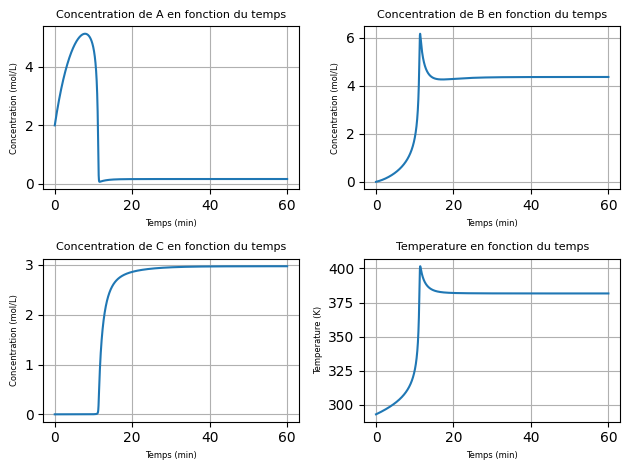

In [55]:

def bilans_mise_a_echelle(t, x, p, u):
    [CA, CB, CC, T] = x #Variables d'etat
    [F, CAin, Tin, V, Hr1, Hr2, Cp, UA, Tc, rho] = p #parametres
    #Eq. diff
    k1 = 2.53 * 10**9 *np.exp (-7500 / T)
    k2 = 7.34 * 10**9 * np.exp(-9500 / T)
    dCA = (F / V) * (CAin - CA) - k1 * CA
    dCB = -(F / V) * CB + k1 * CA - k2 * CB
    dCC = -(F / V) * CC + k2 * CB
    dT = (F / V) * (Tin - T) + (1 / (rho * Cp)) * (- k1 * CA * Hr1 - k2 * CB * Hr2) - (UA * (T - Tc)) / (rho * V * Cp)
    return(dCA, dCB, dCC, dT)
    
#Conditions initiales
x0 = [2, 0, 0, 293]
p = [100.0, 7.5, 293, 600, -71.9, 33.1, 4.18, 85, 313, 1.0]
t_sim = [0, 60] #en min
u0 = []

sim = solve_ivp(bilans_mise_a_echelle, t_sim, x0, method = 'RK45', args = (p, u0), max_step = 0.01)

CA, CB, CC, T = sim.y

#Valeurs en regime permanent
print('Valeurs en regime permanent :')
print(f'CA = {CA[-1]:.2f} mol/L')
print(f'CB = {CB[-1]:.2f} mol/L')
print(f'CC = {CC[-1]:.2f} mol/L')
print(f'T = {T[-1]:.2f} K')

#Graphiques
plt.figure(figsize=(18, 6), dpi=120)
fig, axs = plt.subplots(nrows = 2, ncols =2)


#Graph1
axs[0,0].plot(sim.t, CA)
axs[0,0].set_title('Concentration de A en fonction du temps', fontsize = 8)
axs[0,0].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[0,0].set_xlabel('Temps (min)', fontsize = 6)
axs[0,0].grid()

#Graph2
axs[0,1].plot(sim.t, CB)
axs[0,1].set_title('Concentration de B en fonction du temps', fontsize = 8)
axs[0,1].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[0,1].set_xlabel('Temps (min)', fontsize = 6)    
axs[0,1].grid()

#Graph3
axs[1,0].plot(sim.t, CC)
axs[1,0].set_title('Concentration de C en fonction du temps', fontsize = 8)
axs[1,0].set_ylabel('Concentration (mol/L)', fontsize = 6)
axs[1,0].set_xlabel('Temps (min)', fontsize = 6)
axs[1,0].grid()

#Graph4
axs[1,1].plot(sim.t, T)
axs[1,1].set_title('Temperature en fonction du temps', fontsize = 8)
axs[1,1].set_ylabel('Temperature (K)', fontsize = 6)
axs[1,1].set_xlabel('Temps (min)', fontsize = 6)
axs[1,1].grid()

plt.tight_layout()
plt.show()

#### La temperature lorsqu'on augmente la capacite de production est plus elevee. En effet pour un volume de 60L la temperature est de 339.88K tandis que pour 600L, de 381.66K. 

### x)